This is the jupyter notebook which will hold our neural networks and be used to create graphs and stuff

In [1]:
import numpy as np
from load import *
sets = load_data()
labels = ["X_test",
"y_test",
"person_train_valid",
"X_train_valid",
"y_train_valid",
"person_test"]
print('generating data using all test and all train')
for i, k in enumerate(sets):
    print('{}: {} '.format(labels[i], k.shape))
print('generating data using subj 1 test and subj 1 train')
printy = load_data_subject_1_train_and_test()
for i, k in enumerate(printy):
    print('{}: {} '.format(labels[i], k.shape))
print('generating data using subj 1 test and full train')
thingy = load_data_subject_1_test_and_full_train()
for i, k in enumerate(thingy):
    print('{}: {} '.format(labels[i], k.shape))

generating data using all test and all train
X_test: (443, 22, 1000) 
y_test: (443,) 
person_train_valid: (2115, 1) 
X_train_valid: (2115, 22, 1000) 
y_train_valid: (2115,) 
person_test: (443, 1) 
generating data using subj 1 test and subj 1 train
X_test: (50, 22, 1000) 
y_test: (50,) 
person_train_valid: (2115, 1) 
X_train_valid: (237, 22, 1000) 
y_train_valid: (237,) 
person_test: (443, 1) 
generating data using subj 1 test and full train
X_test: (50, 22, 1000) 
y_test: (50,) 
person_train_valid: (2115, 1) 
X_train_valid: (2115, 22, 1000) 
y_train_valid: (2115,) 
person_test: (443, 1) 


There are 2115 trials and 1000 timestamps. There are 22 electrodes. There are 443 test trials. There are persons 0-8 (inclusive) and person_train_valid[trial] gives the person that was used in the specific trial. 

The following cell takes the y data and subtracts 769 so the classes are 0, 1, 2, 3. DO NOT RUN THIS MORE THAN ONCE PER KERNEL RESTART.

In [2]:
for x in range(y_test.shape[0]):
    y_test[x] -= 769
    
for y in range(y_train_valid.shape[0]):
    y_train_valid[y] -= 769

The below code gets the trials for the first subject (subject 0)

In [3]:
subject_1_count = 0
for i in range(person_train_valid.shape[0]):
    if person_train_valid[i] == 0:
        subject_1_count += 1
subject_1_valid = [0] * subject_1_count
j = 0
for i in range(person_train_valid.shape[0]):
    if person_train_valid[i] == 0:
        subject_1_valid[j] = i
        j += 1
print(f'There are {subject_1_count} trials for subject 1')
print(f'Subject 1 is involved in trials {[x for x in subject_1_valid]}')
s1_x_valid = np.zeros((subject_1_count, 22, 1000))
r = 0
for i in subject_1_valid:
    s1_x_valid[r,:,:] = X_train_valid[i,:,:]
    r += 1
print(f's1_x_valid shape is {s1_x_valid.shape}')
s1_y_valid = np.zeros((subject_1_count))
r = 0
for p in subject_1_valid:
    s1_y_valid[r] = y_train_valid[p]
    r += 1
print(f's1_y_valid shape is {s1_y_valid.shape}')

print('')
print('test data below')

subject_1_count_test = 0
for i in range(person_test.shape[0]):
    if person_test[i] == 0:
        subject_1_count_test += 1
subject_1_valid_test = [0] * subject_1_count_test
j = 0
for i in range(person_test.shape[0]):
    if person_test[i] == 0:
        subject_1_valid_test[j] = i
        j += 1
print(f'There are {subject_1_count_test} trials for subject 1')
print(f'Subject 1 is involved in trials {[x for x in subject_1_valid_test]}')
s1_x_test = np.zeros((subject_1_count_test, 22, 1000))
r = 0
for i in subject_1_valid_test:
    s1_x_test[r,:,:] = X_test[i,:,:]
    r += 1
print(f's1_x_test shape is {s1_x_test.shape}')
s1_y_test = np.zeros((subject_1_count_test))
r = 0
for p in subject_1_valid_test:
    s1_y_test[r] = y_test[p]
    r += 1
print(f's1_y_test shape is {s1_y_test.shape}')

There are 237 trials for subject 1
Subject 1 is involved in trials [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784,

train a NN for the first subject

1 Physical GPUs, 1 Logical GPUs
Train on 189 samples, validate on 48 samples
Epoch 1/100
189/189 [==============================] - 2s 12ms/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/100
189/189 [==============================] - 0s 540us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/100
189/189 [==============================] - 0s 537us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/100
189/189 [==============================] - 0s 523us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/100
189/189 [==============================] - 0s 531us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/100
189/189 [==============================] - 0s 531us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/100
189/189 [=========

189/189 [==============================] - 0s 516us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 56/100
189/189 [==============================] - 0s 537us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 57/100
189/189 [==============================] - 0s 545us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 58/100
189/189 [==============================] - 0s 546us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 59/100
189/189 [==============================] - 0s 546us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 60/100
189/189 [==============================] - 0s 548us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 61/100
189/189 [==============================] - 0s 535us/sample - loss: nan - accuracy: 0.0000e+00 - val_

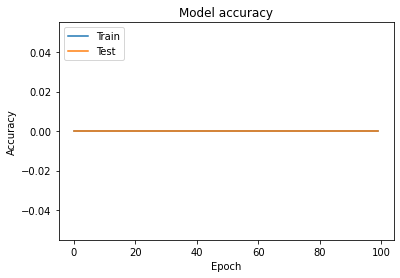

In [4]:
from models import *
init()
model = make_cnn_model(s1_x_valid, s1_y_valid, s1_x_test, s1_y_test)